<h1>How to process dataset for pytorch</h1>
The process to implement a NN below
<ol>
<li><b>Prepare the data</b></li>
<li>Build the model</li>
<li>Train the model</li>
<li>Analyze the models results</li>
</ol>


<h2>lets prepare some data</h2>
<h3>ETL (Extract, Transform, Load)</h3>
<ul>
<li>Extract data from a data source</li>
<li>Transform data into a desirable formate</li>
<li>Load data into a suitable structure</li>
</ul>

In [98]:
import torch
import torchvision #dataset, models, transforms, utils
import torchvision.transforms as transforms

<h3>Lets get the data</h3>
<h4>See the customDatasetmethod.py file for custom data</h4>
this example uses the FashionMNIST dataset which is included in the torchvision.datasets package

In [99]:
#NOTE:root argument used to be './data/FashionMNIST'
#it has since changed due to torchvision updates.
train_set = torchvision.datasets.FashionMNIST(
    #location where data is located
    root='./data' #if not exists will create
    #if the dataset is the training set
    ,train=True
    #if the data should be downloaded
    ,download=True
    #composition of transformations that should be preformed
    #on dataset elements
        #this is a single transformation turning data to tensor
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

In [100]:
train_loader = torch.utils.data.DataLoader(train_set
    ,batch_size=1000 #default is one
    ,shuffle=True
)

<h2>dataset, dataloader</h2>
we have two Pytorch objects<br>
dataset: train_set
dataloader: train_loader

In [101]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)


In [102]:
len(train_set)

60000

In [103]:
train_set.train_labels

tensor([9, 0, 0,  ..., 3, 0, 5])

In [104]:
train_set.train_labels.bincount() #create bins of labels
#count the items in each bin

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

<h2>Accessing Data in the Training Set</h3>
Data is in image sample pairs<br>
<b>each sample</b> contains <b>image data tensor</b> AND <b>label tensor</b>

In [105]:
sample = next(iter(train_set))
len(sample)

2

In [106]:
type(sample)

tuple

In [107]:
#sequence unpacking 
#destructing object
image, label = sample

In [108]:
type(image)

torch.Tensor

In [109]:
type(label)

int

In [110]:
image.shape

torch.Size([1, 28, 28])

rank 3 tensor<br>
[color channel, height, width]

In [111]:
torch.tensor(label).shape

torch.Size([])

In [112]:
image.squeeze().shape

torch.Size([28, 28])

tensor(9)

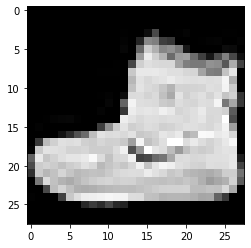

In [113]:
plt.imshow(image.squeeze(), cmap="gray")
torch.tensor(label)

<h3>Working with Batches of Data</h3>
we can look at a batch of data like above by defining a new dataloader

In [114]:
display_loader = torch.utils.data.DataLoader(
    train_set, batch_size=10
)

In [115]:
batch = next(iter(display_loader))
print('len: ', len(batch))

len:  2


In [116]:
images, labels = batch

In [117]:
print('types: ', type(images), type(labels))
print('shapes: ', images.shape, labels.shape)

types:  <class 'torch.Tensor'> <class 'torch.Tensor'>
shapes:  torch.Size([10, 1, 28, 28]) torch.Size([10])


<h4>View the batch of data</h4>

In [118]:
grid = torchvision.utils.make_grid(images, nrow=10)

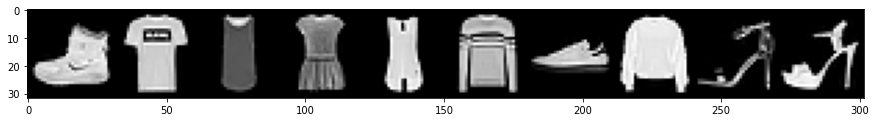

In [119]:
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

In [120]:
print('labels: ', labels)

labels:  tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


<h4>More Pretty function to plot data</h4>

In [121]:
how_many_to_plot = 20


In [122]:
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=1, shuffle=True
)

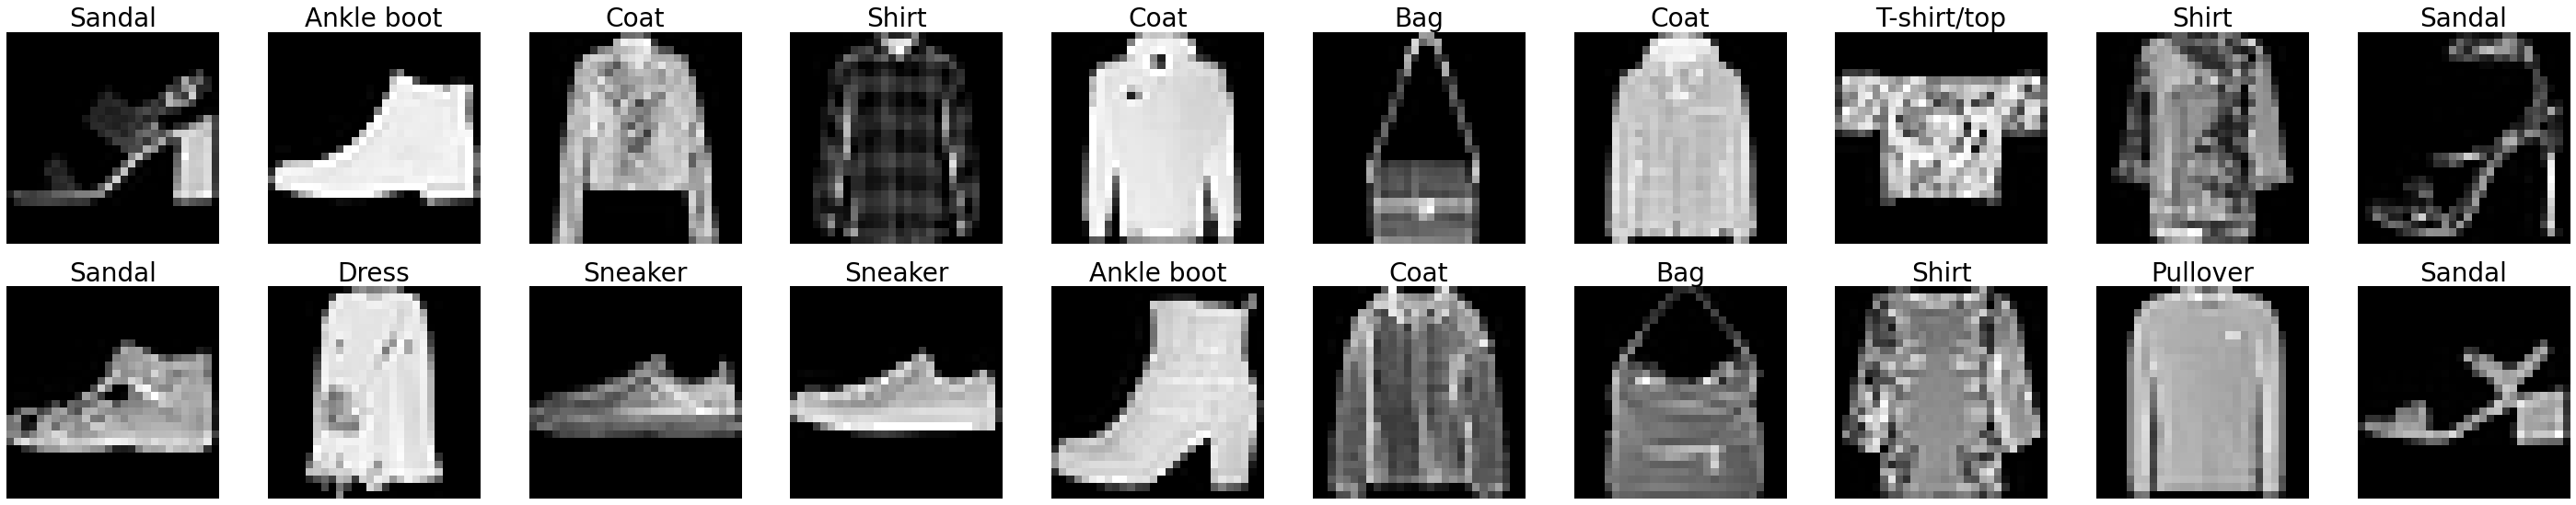

In [123]:
plt.figure(figsize=(50,50))
for i, batch in enumerate(train_loader, start=1):
    image, label = batch
    plt.subplot(10,10,i)
    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(train_set.classes[label.item()], fontsize=28)
    if (i >= how_many_to_plot): break
plt.show()